In [117]:
print("hello world")

hello world


In [118]:
import torch 
import torch.nn as nn
import  torchvision 
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import PIL


In [135]:
#variables required 

batch_size = 64
num_classes=10
learning_rate = 0.001
epochs = 10



In [120]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [121]:
train_dataset=torchvision.datasets.MNIST(
  root="./data",
    train=True, 
    transform=transforms.Compose([
      transforms.Resize((32,32)),
      transforms.ToTensor(),
      transforms.Normalize(mean=(0.137), std=(0.3801))
       ]),
    download=True 
)

In [ ]:
test_dataset=torchvision.datasets.MNIST(
  root="./data",
  train=False,
  transform=transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.137), std=(0.3801))
    
    
  ]),
  download=True 
  
)

In [ ]:
print(len(train_dataset))
print(len(test_dataset))

In [124]:
train_loader=torch.utils.data.DataLoader(train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)

test_loader=torch.utils.data.DataLoader(test_dataset,
                                        batch_size=batch_size,
                                        shuffle=True)


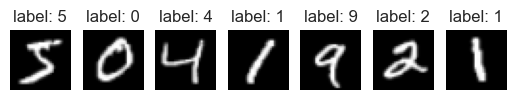

In [125]:
for i in range(7):
    image, label = train_dataset[i]
    plt.subplot(1, 7, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')  # Add parentheses to call the squeeze method
    plt.axis('off')
    plt.title(f"label: {label}")
plt.show()

  
  

In [126]:
#lenet Architecture

#Defining the convolutional neural network
class LeNet5(nn.Module):
 def __init__(self, num_classes):
    super(LeNet5, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
        nn.BatchNorm2d(6),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
    self.layer2 = nn.Sequential(
        nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
    self.fc = nn.Linear(400, 120)
    self.relu = nn.ReLU()
    self.fc1 = nn.Linear(120, 84)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(84, num_classes)
    
 def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
    out = self.relu(out)
    out = self.fc1(out)
    out = self.relu1(out)
    out = self.fc2(out)
    return out

In [127]:
#model and hyperparameters
model=LeNet5(num_classes=10)
model=model.to(device)
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
total_step=len(train_loader)


In [136]:
#model training 
for epoch in range(epochs):  # Loop over epochs
    model.train()  # Ensure the model is in training mode

    running_loss = 0.0
    for step, (inputs, labels) in enumerate(train_loader):  # Loop over batches
        # Move data to device (GPU/CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

        # Print every 400 steps
        if step % 400 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{step}/{len(train_loader)}], Loss: {loss.item():.4f}")

    # Print the average loss for the epoch
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epochs}], Average Loss: {avg_loss:.4f}")



Epoch [1/10], Step [0/938], Loss: 0.0000
Epoch [1/10], Step [400/938], Loss: 0.0468
Epoch [1/10], Step [800/938], Loss: 0.0002
Epoch [1/10], Average Loss: 0.0270
Epoch [2/10], Step [0/938], Loss: 0.0023
Epoch [2/10], Step [400/938], Loss: 0.1588
Epoch [2/10], Step [800/938], Loss: 0.0262
Epoch [2/10], Average Loss: 0.0256
Epoch [3/10], Step [0/938], Loss: 0.0010
Epoch [3/10], Step [400/938], Loss: 0.0004
Epoch [3/10], Step [800/938], Loss: 0.0073
Epoch [3/10], Average Loss: 0.0225
Epoch [4/10], Step [0/938], Loss: 0.0002
Epoch [4/10], Step [400/938], Loss: 0.0911
Epoch [4/10], Step [800/938], Loss: 0.0001
Epoch [4/10], Average Loss: 0.0197
Epoch [5/10], Step [0/938], Loss: 0.2086
Epoch [5/10], Step [400/938], Loss: 0.0001
Epoch [5/10], Step [800/938], Loss: 0.0117
Epoch [5/10], Average Loss: 0.0236
Epoch [6/10], Step [0/938], Loss: 0.0010
Epoch [6/10], Step [400/938], Loss: 0.0002
Epoch [6/10], Step [800/938], Loss: 0.0004
Epoch [6/10], Average Loss: 0.0231
Epoch [7/10], Step [0/938], 

In [129]:
with torch.inference_mode():
    correct=0
    total=0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct +=(predicted==labels).sum().item()
        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 100.0 %
Accuracy of the network on the 10000 test images: 100.0 %
Accuracy of the network on the 10000 test images: 100.0 %
Accuracy of the network on the 10000 test images: 99.609375 %
Accuracy of the network on the 10000 test images: 99.375 %
Accuracy of the network on the 10000 test images: 99.21875 %
Accuracy of the network on the 10000 test images: 98.88392857142857 %
Accuracy of the network on the 10000 test images: 99.0234375 %
Accuracy of the network on the 10000 test images: 98.78472222222223 %
Accuracy of the network on the 10000 test images: 98.75 %
Accuracy of the network on the 10000 test images: 98.57954545454545 %
Accuracy of the network on the 10000 test images: 98.56770833333333 %
Accuracy of the network on the 10000 test images: 98.5576923076923 %
Accuracy of the network on the 10000 test images: 98.54910714285714 %
Accuracy of the network on the 10000 test images: 98.4375 %
Accuracy of the network on the 10000 test im